In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('ready_df.csv', delimiter=',')

In [3]:
def do_stat(i, test_y, test_X, m, frr_sr, far_sr, eer_sr, accuracy_sr, precision_sr, recall_sr, F1_sr):
    #print(confusion_matrix(test_y, m.predict(test_X)))
    tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
    fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
    fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
    tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
    frr = fn/(tp+fn)
    frr_sr += frr
    far = fp/(tp+fp)
    far_sr += far
    eer = (frr+far)/2
    eer_sr += eer
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    accuracy_sr += accuracy
    precision = tp/(tp+fp)
    precision_sr += precision
    recall = tp/(tp+fn)
    recall_sr += recall
    f1 = 2 * (precision * recall) / (precision + recall)
    F1_sr += f1
    print(i)
    print('frr = ' + str(round(frr, 3)))
    print('far = ' + str(round(far, 3)))
    print('eer = ' + str(round(eer, 3)))
    print('accuracy = ' + str(round(accuracy, 3)))
    print('precision = ' + str(round(precision, 3)))
    print('recall = ' + str(round(recall, 3)))
    print('f1 = ' + str(round(f1, 3)))
    # plot ROC Curve
    fpr, tpr, thresholds = roc_curve(test_y, m.predict_proba(test_X)[:,1])
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('AUC-ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    return list([frr_sr, far_sr, eer_sr, accuracy_sr, precision_sr, recall_sr, F1_sr])
        
def do_avg_stat(frr_sr, far_sr, eer_sr, accuracy_sr, precision_sr, recall_sr, F1_sr, count):
    frr_sr = frr_sr/count
    far_sr = far_sr/count
    eer_sr = eer_sr/count
    accuracy_sr = accuracy_sr/count
    precision_sr = precision_sr/count
    recall_sr = recall_sr/count
    F1_sr = F1_sr/count
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

# LogisticRegression

In [4]:
def logistic_reg(dataframe, count):
    stat = [0.0000] * 7
    for i in range(1,count+1):
        model = LogisticRegression()
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m = model.fit(train_X, train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        stat = do_stat(i, test_y, test_X, m, stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6])
    do_avg_stat(stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6], count)

[[528  59]
 [190 111]]
1
frr = 0.265
far = 0.101
eer = 0.183
accuracy = 0.72
precision = 0.899
recall = 0.735
f1 = 0.809


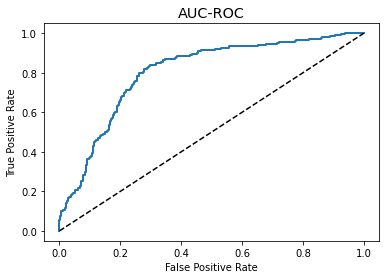

[[507  85]
 [177 119]]
2
frr = 0.259
far = 0.144
eer = 0.201
accuracy = 0.705
precision = 0.856
recall = 0.741
f1 = 0.795


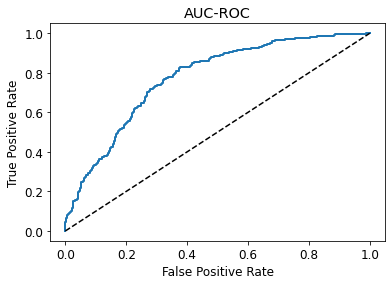

[[527  52]
 [198 111]]
3
frr = 0.273
far = 0.09
eer = 0.181
accuracy = 0.718
precision = 0.91
recall = 0.727
f1 = 0.808


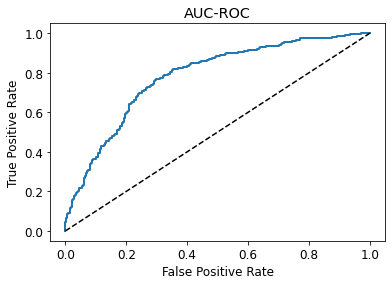

[[511  55]
 [201 121]]
4
frr = 0.282
far = 0.097
eer = 0.19
accuracy = 0.712
precision = 0.903
recall = 0.718
f1 = 0.8


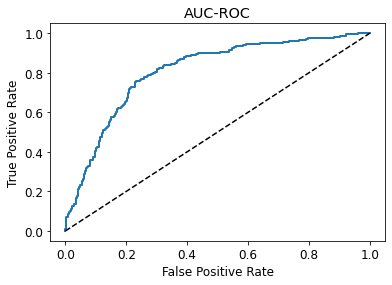

[[523  72]
 [182 111]]
5
frr = 0.258
far = 0.121
eer = 0.19
accuracy = 0.714
precision = 0.879
recall = 0.742
f1 = 0.805


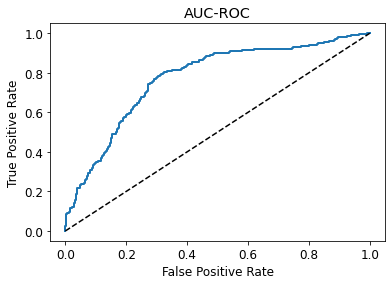

[[536  61]
 [180 111]]
6
frr = 0.251
far = 0.102
eer = 0.177
accuracy = 0.729
precision = 0.898
recall = 0.749
f1 = 0.816


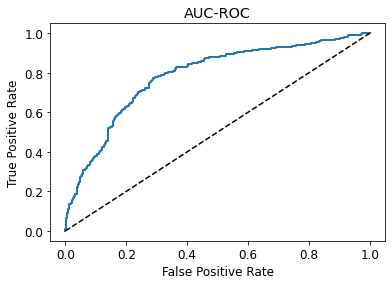

[[519  76]
 [172 121]]
7
frr = 0.249
far = 0.128
eer = 0.188
accuracy = 0.721
precision = 0.872
recall = 0.751
f1 = 0.807


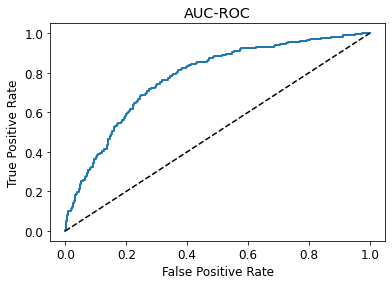

[[532  59]
 [183 114]]
8
frr = 0.256
far = 0.1
eer = 0.178
accuracy = 0.727
precision = 0.9
recall = 0.744
f1 = 0.815


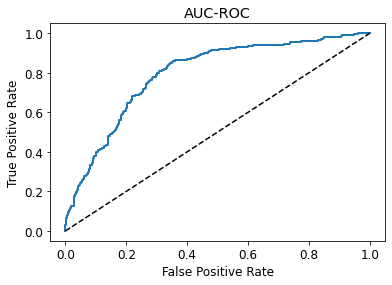

[[530  59]
 [182 117]]
9
frr = 0.256
far = 0.1
eer = 0.178
accuracy = 0.729
precision = 0.9
recall = 0.744
f1 = 0.815


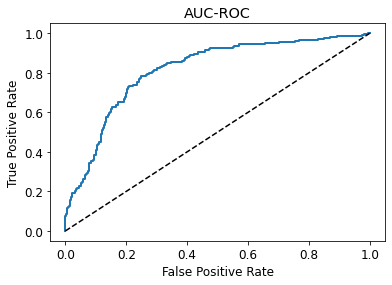

[[507  62]
 [194 125]]
10
frr = 0.277
far = 0.109
eer = 0.193
accuracy = 0.712
precision = 0.891
recall = 0.723
f1 = 0.798


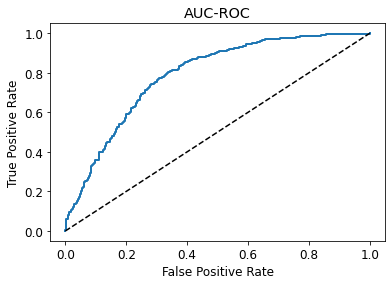

[[548  61]
 [169 110]]
11
frr = 0.236
far = 0.1
eer = 0.168
accuracy = 0.741
precision = 0.9
recall = 0.764
f1 = 0.827


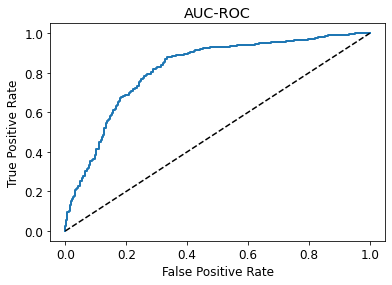

[[524  52]
 [191 121]]
12
frr = 0.267
far = 0.09
eer = 0.179
accuracy = 0.726
precision = 0.91
recall = 0.733
f1 = 0.812


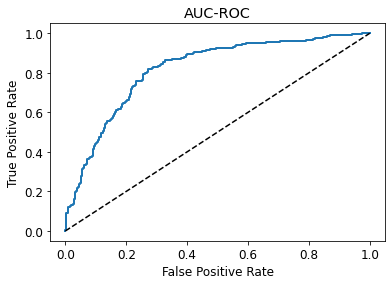

[[534  57]
 [181 116]]
13
frr = 0.253
far = 0.096
eer = 0.175
accuracy = 0.732
precision = 0.904
recall = 0.747
f1 = 0.818


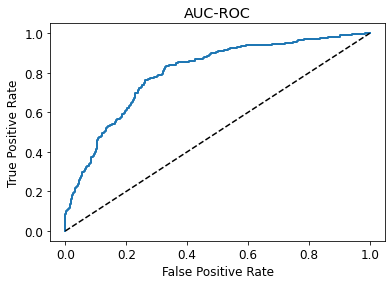

[[550  51]
 [158 129]]
14
frr = 0.223
far = 0.085
eer = 0.154
accuracy = 0.765
precision = 0.915
recall = 0.777
f1 = 0.84


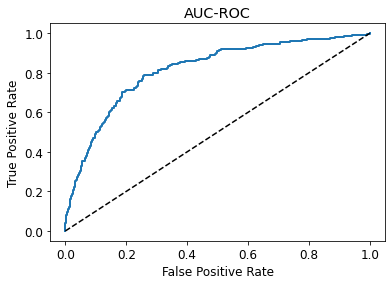

[[513  49]
 [199 127]]
15
frr = 0.279
far = 0.087
eer = 0.183
accuracy = 0.721
precision = 0.913
recall = 0.721
f1 = 0.805


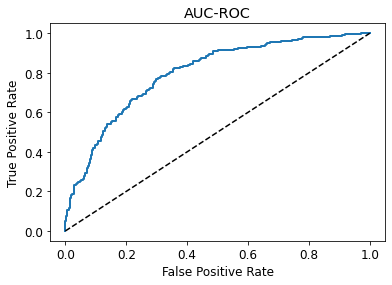

[[534  70]
 [154 130]]
16
frr = 0.224
far = 0.116
eer = 0.17
accuracy = 0.748
precision = 0.884
recall = 0.776
f1 = 0.827


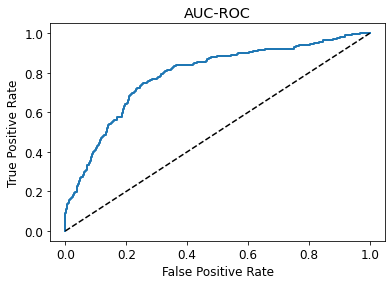

[[539  59]
 [180 110]]
17
frr = 0.25
far = 0.099
eer = 0.175
accuracy = 0.731
precision = 0.901
recall = 0.75
f1 = 0.819


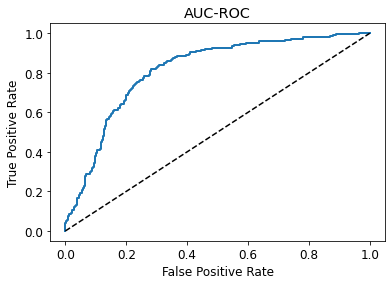

[[519  70]
 [176 123]]
18
frr = 0.253
far = 0.119
eer = 0.186
accuracy = 0.723
precision = 0.881
recall = 0.747
f1 = 0.808


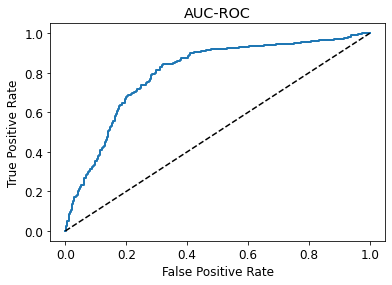

[[533  60]
 [175 120]]
19
frr = 0.247
far = 0.101
eer = 0.174
accuracy = 0.735
precision = 0.899
recall = 0.753
f1 = 0.819


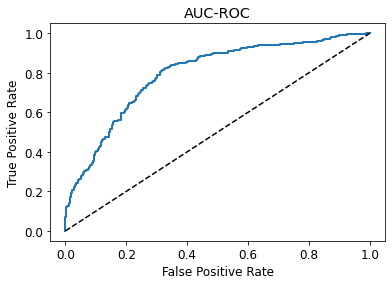

[[537  68]
 [184  99]]
20
frr = 0.255
far = 0.112
eer = 0.184
accuracy = 0.716
precision = 0.888
recall = 0.745
f1 = 0.81


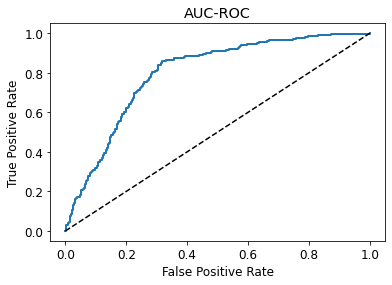

frr_sr = 0.256
far_sr = 0.105
eer_sr = 0.18
accuracy_sr = 0.726
precision_sr = 0.895
recall_sr = 0.744
F1_sr = 0.813


In [5]:
logistic_reg(df, 20)

# kNN

## Определим k

In [6]:
X = np.array(df[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
y = np.array(df['y'].values)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30)

In [7]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(train_X,train_y)
    
    train_scores.append(knn.score(train_X,train_y))
    test_scores.append(knn.score(test_X,test_y))

In [8]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [9]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.64864864864865 % and k = [9]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


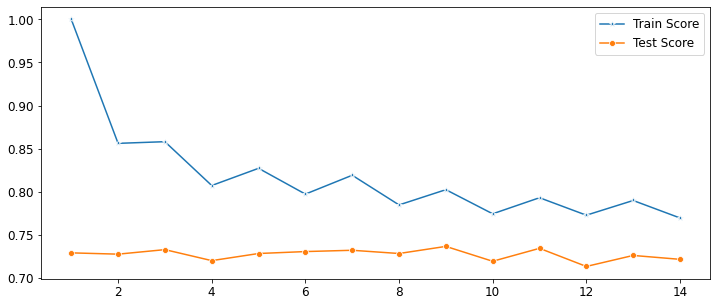

In [10]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [11]:
def knn(dataframe, count, k):
    stat = [0.0000] * 7
    for i in range(1,count+1):
        model = KNeighborsClassifier(k)
        df_mix = dataframe.sample(frac=1).reset_index(drop=True)
        X = np.array(df_mix[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(df_mix['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m = model.fit(train_X, train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        stat = do_stat(i, test_y, test_X, m, stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6])
    do_avg_stat(stat[0], stat[1], stat[2], stat[3], stat[4], stat[5], stat[6], count)

[[552  58]
 [163 115]]
1
frr = 0.228
far = 0.095
eer = 0.162
accuracy = 0.751
precision = 0.905
recall = 0.772
f1 = 0.833


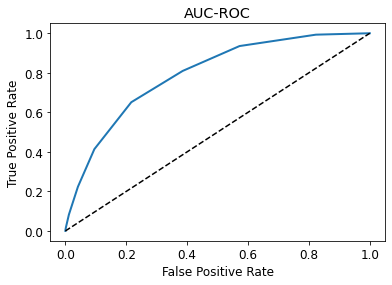

[[533  63]
 [183 109]]
2
frr = 0.256
far = 0.106
eer = 0.181
accuracy = 0.723
precision = 0.894
recall = 0.744
f1 = 0.812


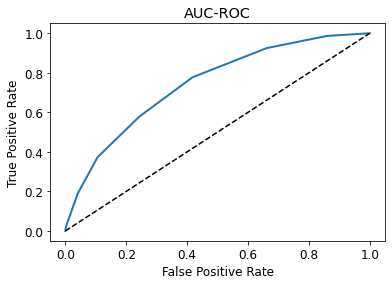

[[530  66]
 [171 121]]
3
frr = 0.244
far = 0.111
eer = 0.177
accuracy = 0.733
precision = 0.889
recall = 0.756
f1 = 0.817


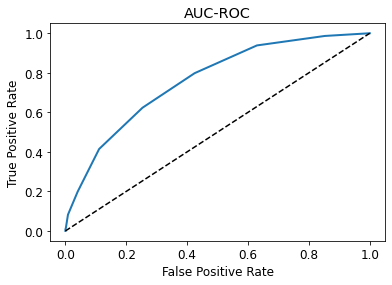

[[526  68]
 [174 120]]
4
frr = 0.249
far = 0.114
eer = 0.182
accuracy = 0.727
precision = 0.886
recall = 0.751
f1 = 0.813


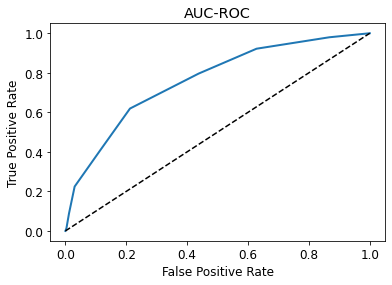

[[533  51]
 [167 137]]
5
frr = 0.239
far = 0.087
eer = 0.163
accuracy = 0.755
precision = 0.913
recall = 0.761
f1 = 0.83


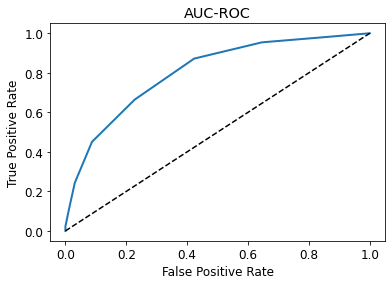

[[528  63]
 [155 142]]
6
frr = 0.227
far = 0.107
eer = 0.167
accuracy = 0.755
precision = 0.893
recall = 0.773
f1 = 0.829


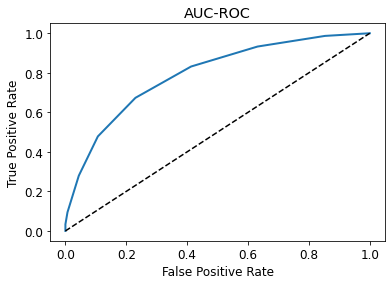

[[542  50]
 [163 133]]
7
frr = 0.231
far = 0.084
eer = 0.158
accuracy = 0.76
precision = 0.916
recall = 0.769
f1 = 0.836


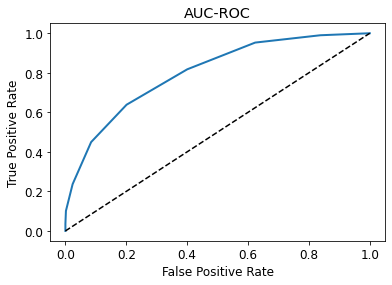

[[540  51]
 [177 120]]
8
frr = 0.247
far = 0.086
eer = 0.167
accuracy = 0.743
precision = 0.914
recall = 0.753
f1 = 0.826


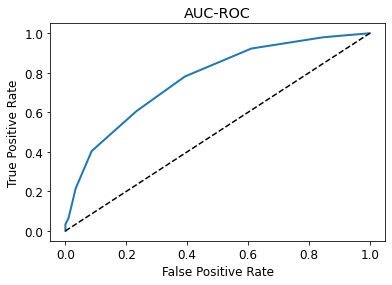

[[521  60]
 [176 131]]
9
frr = 0.253
far = 0.103
eer = 0.178
accuracy = 0.734
precision = 0.897
recall = 0.747
f1 = 0.815


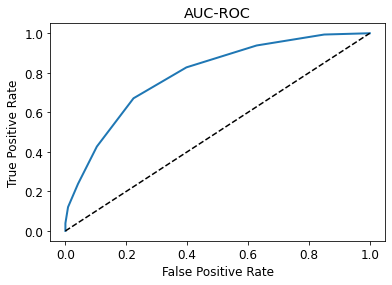

[[534  61]
 [168 125]]
10
frr = 0.239
far = 0.103
eer = 0.171
accuracy = 0.742
precision = 0.897
recall = 0.761
f1 = 0.823


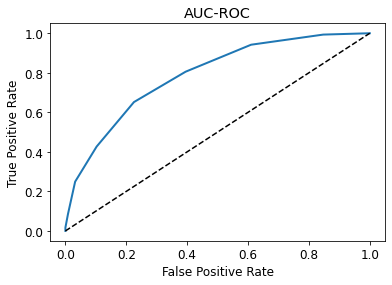

[[539  58]
 [171 120]]
11
frr = 0.241
far = 0.097
eer = 0.169
accuracy = 0.742
precision = 0.903
recall = 0.759
f1 = 0.825


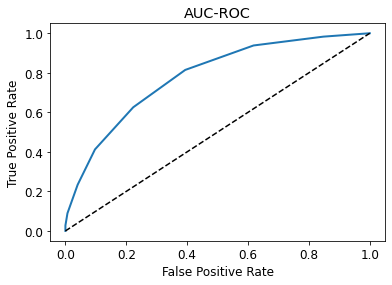

[[516  74]
 [170 128]]
12
frr = 0.248
far = 0.125
eer = 0.187
accuracy = 0.725
precision = 0.875
recall = 0.752
f1 = 0.809


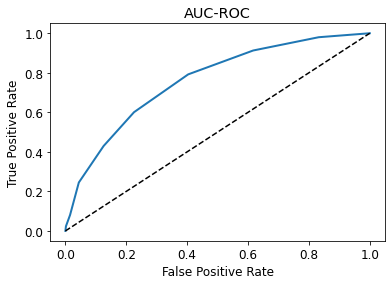

[[536  54]
 [164 134]]
13
frr = 0.234
far = 0.092
eer = 0.163
accuracy = 0.755
precision = 0.908
recall = 0.766
f1 = 0.831


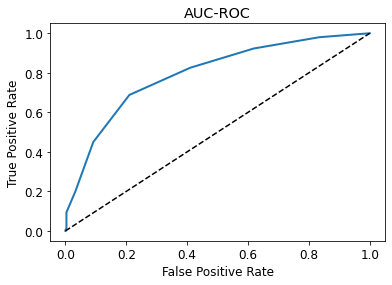

[[530  50]
 [181 127]]
14
frr = 0.255
far = 0.086
eer = 0.17
accuracy = 0.74
precision = 0.914
recall = 0.745
f1 = 0.821


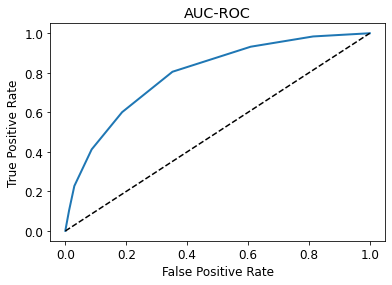

[[524  62]
 [168 134]]
15
frr = 0.243
far = 0.106
eer = 0.174
accuracy = 0.741
precision = 0.894
recall = 0.757
f1 = 0.82


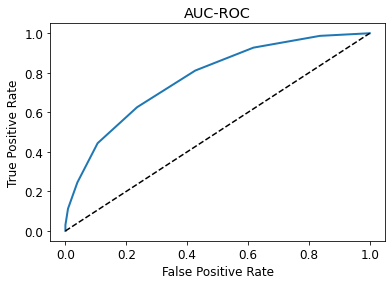

[[532  55]
 [175 126]]
16
frr = 0.248
far = 0.094
eer = 0.171
accuracy = 0.741
precision = 0.906
recall = 0.752
f1 = 0.822


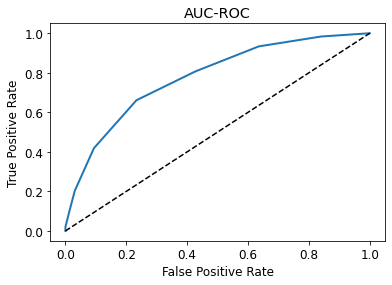

[[524  66]
 [174 124]]
17
frr = 0.249
far = 0.112
eer = 0.181
accuracy = 0.73
precision = 0.888
recall = 0.751
f1 = 0.814


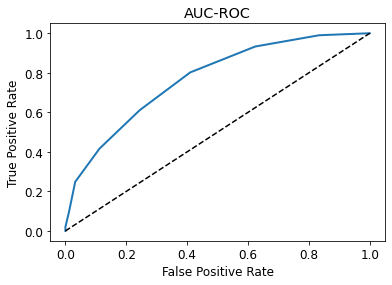

[[544  68]
 [150 126]]
18
frr = 0.216
far = 0.111
eer = 0.164
accuracy = 0.755
precision = 0.889
recall = 0.784
f1 = 0.833


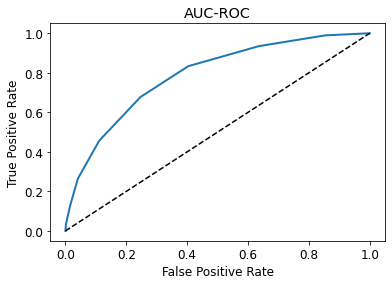

[[525  56]
 [184 123]]
19
frr = 0.26
far = 0.096
eer = 0.178
accuracy = 0.73
precision = 0.904
recall = 0.74
f1 = 0.814


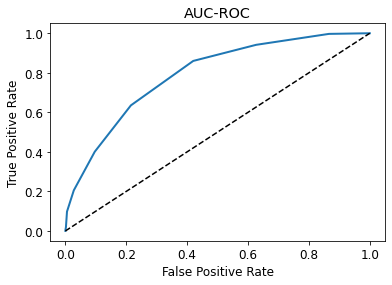

[[532  61]
 [173 122]]
20
frr = 0.245
far = 0.103
eer = 0.174
accuracy = 0.736
precision = 0.897
recall = 0.755
f1 = 0.82


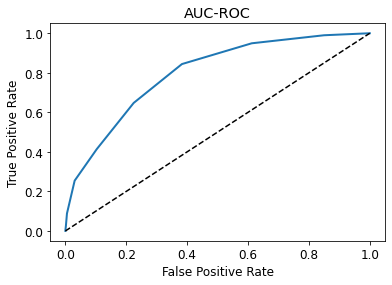

frr_sr = 0.242
far_sr = 0.101
eer_sr = 0.172
accuracy_sr = 0.741
precision_sr = 0.899
recall_sr = 0.758
F1_sr = 0.822


In [12]:
knn(df, 20, 9)

# SVM

In [13]:
def svm_rbf(dataframe, C):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000  
    for i in range(1,21):
        m=SVC(C=C)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(dataframe.iloc[:, :-2].values)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m.fit(train_X,train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

In [203]:
svm_rbf(df, 100.00)

[[557  42]
 [ 42 247]]
1
frr = 0.07
far = 0.07
eer = 0.07
accuracy = 0.905
precision = 0.93
recall = 0.93
f1 = 0.93
[[542  52]
 [ 37 257]]
2
frr = 0.064
far = 0.088
eer = 0.076
accuracy = 0.9
precision = 0.912
recall = 0.936
f1 = 0.924
[[571  45]
 [ 33 239]]
3
frr = 0.055
far = 0.073
eer = 0.064
accuracy = 0.912
precision = 0.927
recall = 0.945
f1 = 0.936
[[552  37]
 [ 42 257]]
4
frr = 0.071
far = 0.063
eer = 0.067
accuracy = 0.911
precision = 0.937
recall = 0.929
f1 = 0.933
[[561  40]
 [ 39 248]]
5
frr = 0.065
far = 0.067
eer = 0.066
accuracy = 0.911
precision = 0.933
recall = 0.935
f1 = 0.934
[[554  38]
 [ 37 259]]
6
frr = 0.063
far = 0.064
eer = 0.063
accuracy = 0.916
precision = 0.936
recall = 0.937
f1 = 0.937
[[564  44]
 [ 32 248]]
7
frr = 0.054
far = 0.072
eer = 0.063
accuracy = 0.914
precision = 0.928
recall = 0.946
f1 = 0.937
[[558  39]
 [ 43 248]]
8
frr = 0.072
far = 0.065
eer = 0.068
accuracy = 0.908
precision = 0.935
recall = 0.928
f1 = 0.932
[[556  45]
 [ 32 255]]
9
frr = 0

In [16]:
def svm_linear(dataframe, C):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000  
    for i in range(1,21):
        m=SVC(kernel='linear', C=C, probability=True)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(dataframe.iloc[:, :-2].values)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m.fit(train_X,train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        # plot ROC Curve
        fpr, tpr, thresholds = roc_curve(test_y, m.predict_proba(test_X)[:,1])
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, linewidth=2)
        plt.plot([0,1], [0,1], 'k--' )
        plt.rcParams['font.size'] = 12
        plt.title('AUC-ROC для SVM')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

[[528  57]
 [153 150]]
1


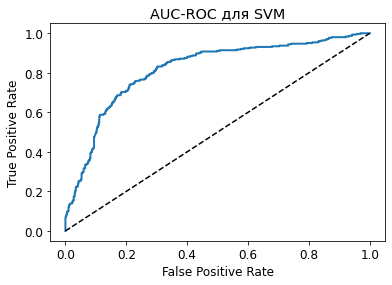

frr = 0.225
far = 0.097
eer = 0.161
accuracy = 0.764
precision = 0.903
recall = 0.775
f1 = 0.834
[[526  76]
 [140 146]]
2


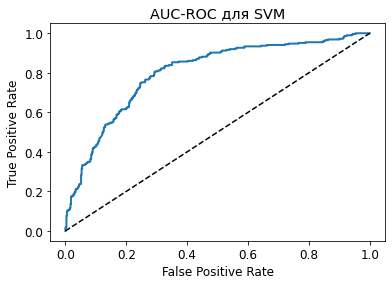

frr = 0.21
far = 0.126
eer = 0.168
accuracy = 0.757
precision = 0.874
recall = 0.79
f1 = 0.83
[[524  70]
 [144 150]]
3


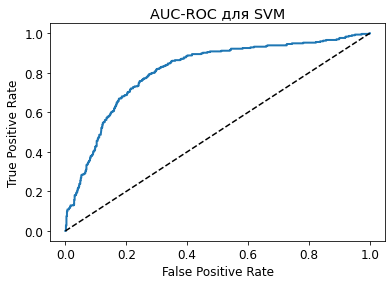

frr = 0.216
far = 0.118
eer = 0.167
accuracy = 0.759
precision = 0.882
recall = 0.784
f1 = 0.83
[[531  75]
 [153 129]]
4


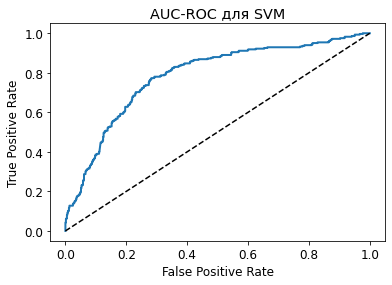

frr = 0.224
far = 0.124
eer = 0.174
accuracy = 0.743
precision = 0.876
recall = 0.776
f1 = 0.823
[[485  89]
 [171 143]]
5


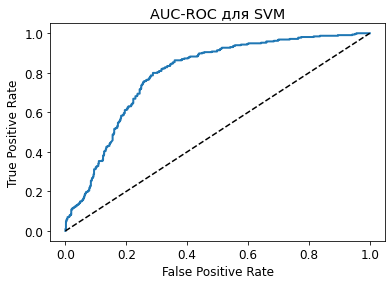

frr = 0.261
far = 0.155
eer = 0.208
accuracy = 0.707
precision = 0.845
recall = 0.739
f1 = 0.789
[[552  64]
 [154 118]]
6


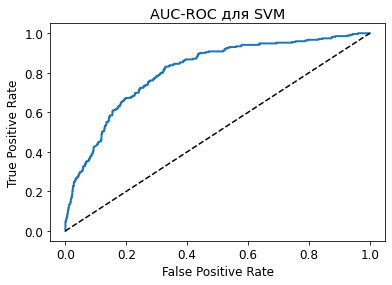

frr = 0.218
far = 0.104
eer = 0.161
accuracy = 0.755
precision = 0.896
recall = 0.782
f1 = 0.835
[[518  71]
 [162 137]]
7


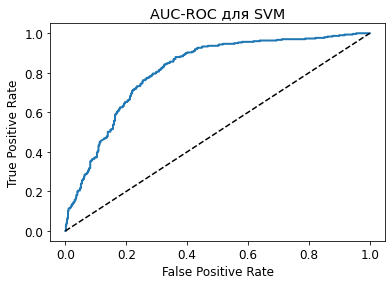

frr = 0.238
far = 0.121
eer = 0.179
accuracy = 0.738
precision = 0.879
recall = 0.762
f1 = 0.816
[[538  70]
 [123 157]]
8


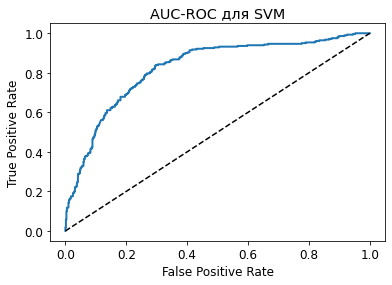

frr = 0.186
far = 0.115
eer = 0.151
accuracy = 0.783
precision = 0.885
recall = 0.814
f1 = 0.848
[[527  76]
 [147 138]]
9


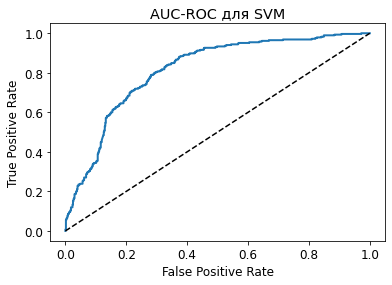

frr = 0.218
far = 0.126
eer = 0.172
accuracy = 0.749
precision = 0.874
recall = 0.782
f1 = 0.825
[[527  59]
 [167 135]]
10


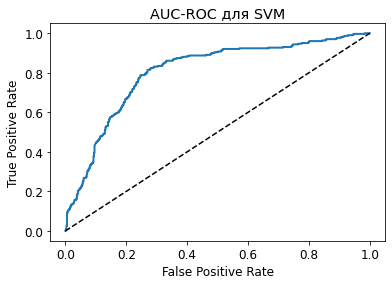

frr = 0.241
far = 0.101
eer = 0.171
accuracy = 0.745
precision = 0.899
recall = 0.759
f1 = 0.823
[[530  59]
 [170 129]]
11


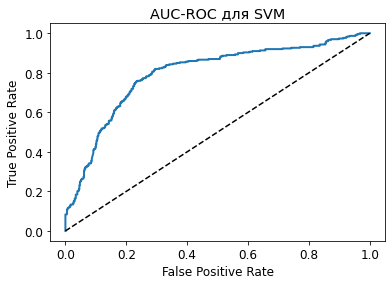

frr = 0.243
far = 0.1
eer = 0.172
accuracy = 0.742
precision = 0.9
recall = 0.757
f1 = 0.822
[[501  80]
 [165 142]]
12


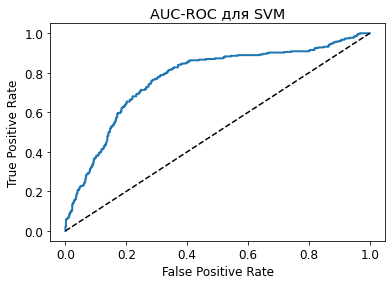

frr = 0.248
far = 0.138
eer = 0.193
accuracy = 0.724
precision = 0.862
recall = 0.752
f1 = 0.804
[[538  73]
 [154 123]]
13


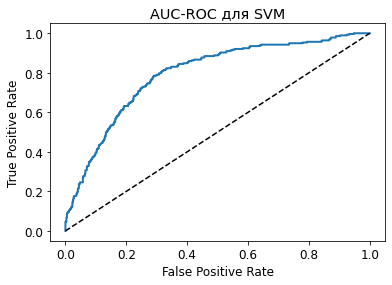

frr = 0.223
far = 0.119
eer = 0.171
accuracy = 0.744
precision = 0.881
recall = 0.777
f1 = 0.826
[[540  76]
 [143 129]]
14


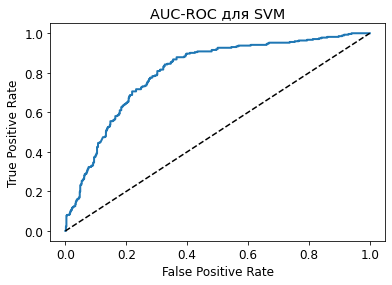

frr = 0.209
far = 0.123
eer = 0.166
accuracy = 0.753
precision = 0.877
recall = 0.791
f1 = 0.831
[[511  78]
 [153 146]]
15


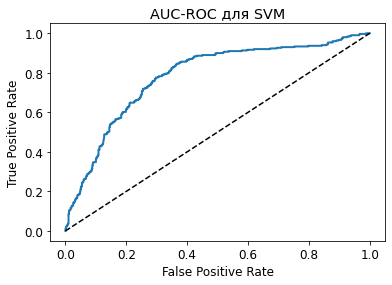

frr = 0.23
far = 0.132
eer = 0.181
accuracy = 0.74
precision = 0.868
recall = 0.77
f1 = 0.816
[[512  63]
 [171 142]]
16


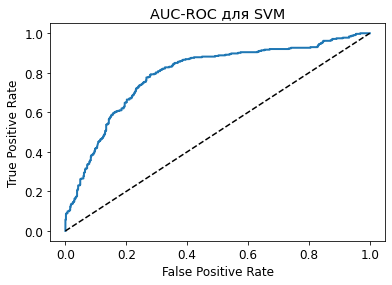

frr = 0.25
far = 0.11
eer = 0.18
accuracy = 0.736
precision = 0.89
recall = 0.75
f1 = 0.814
[[534  77]
 [149 128]]
17


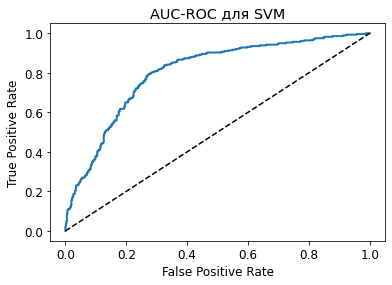

frr = 0.218
far = 0.126
eer = 0.172
accuracy = 0.745
precision = 0.874
recall = 0.782
f1 = 0.825
[[528  66]
 [164 130]]
18


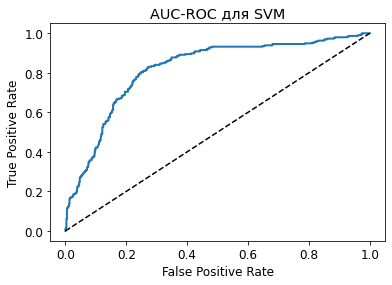

frr = 0.237
far = 0.111
eer = 0.174
accuracy = 0.741
precision = 0.889
recall = 0.763
f1 = 0.821
[[511  71]
 [170 136]]
19


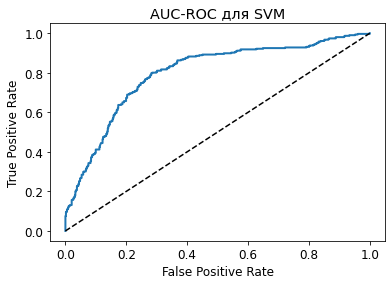

frr = 0.25
far = 0.122
eer = 0.186
accuracy = 0.729
precision = 0.878
recall = 0.75
f1 = 0.809
[[515  70]
 [169 134]]
20


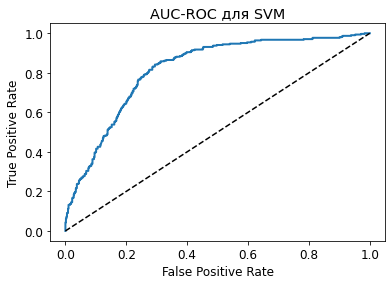

frr = 0.247
far = 0.12
eer = 0.183
accuracy = 0.731
precision = 0.88
recall = 0.753
f1 = 0.812
frr_sr = 0.23
far_sr = 0.119
eer_sr = 0.174
accuracy_sr = 0.744
precision_sr = 0.881
recall_sr = 0.77
F1_sr = 0.822


In [17]:
svm_linear(df, 1000.0)

In [18]:
def svm_poly(dataframe, C):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000  
    for i in range(1,21):
        m=SVC(kernel='poly', C=C)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        #X = np.array(dataframe.iloc[:, :-2].values)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)
        m.fit(train_X,train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

In [19]:
svm_poly(df, 100.0)

[[541  47]
 [ 38 262]]
1
frr = 0.066
far = 0.08
eer = 0.073
accuracy = 0.904
precision = 0.92
recall = 0.934
f1 = 0.927
[[560  48]
 [ 34 246]]
2
frr = 0.057
far = 0.079
eer = 0.068
accuracy = 0.908
precision = 0.921
recall = 0.943
f1 = 0.932
[[553  44]
 [ 35 256]]
3
frr = 0.06
far = 0.074
eer = 0.067
accuracy = 0.911
precision = 0.926
recall = 0.94
f1 = 0.933
[[558  34]
 [ 41 255]]
4
frr = 0.068
far = 0.057
eer = 0.063
accuracy = 0.916
precision = 0.943
recall = 0.932
f1 = 0.937
[[544  39]
 [ 36 269]]
5
frr = 0.062
far = 0.067
eer = 0.064
accuracy = 0.916
precision = 0.933
recall = 0.938
f1 = 0.936
[[546  41]
 [ 36 265]]
6
frr = 0.062
far = 0.07
eer = 0.066
accuracy = 0.913
precision = 0.93
recall = 0.938
f1 = 0.934
[[541  30]
 [ 40 277]]
7
frr = 0.069
far = 0.053
eer = 0.061
accuracy = 0.921
precision = 0.947
recall = 0.931
f1 = 0.939
[[586  37]
 [ 33 232]]
8
frr = 0.053
far = 0.059
eer = 0.056
accuracy = 0.921
precision = 0.941
recall = 0.947
f1 = 0.944
[[581  29]
 [ 37 241]]
9
frr =

In [20]:
svm_poly(df, 1000.0)

[[569  42]
 [ 32 245]]
1
frr = 0.053
far = 0.069
eer = 0.061
accuracy = 0.917
precision = 0.931
recall = 0.947
f1 = 0.939
[[559  51]
 [ 39 239]]
2
frr = 0.065
far = 0.084
eer = 0.074
accuracy = 0.899
precision = 0.916
recall = 0.935
f1 = 0.925
[[554  47]
 [ 40 247]]
3
frr = 0.067
far = 0.078
eer = 0.073
accuracy = 0.902
precision = 0.922
recall = 0.933
f1 = 0.927
[[557  37]
 [ 36 258]]
4
frr = 0.061
far = 0.062
eer = 0.061
accuracy = 0.918
precision = 0.938
recall = 0.939
f1 = 0.939
[[537  51]
 [ 33 267]]
5
frr = 0.058
far = 0.087
eer = 0.072
accuracy = 0.905
precision = 0.913
recall = 0.942
f1 = 0.927
[[561  28]
 [ 50 249]]
6
frr = 0.082
far = 0.048
eer = 0.065
accuracy = 0.912
precision = 0.952
recall = 0.918
f1 = 0.935
[[555  41]
 [ 42 250]]
7
frr = 0.07
far = 0.069
eer = 0.07
accuracy = 0.907
precision = 0.931
recall = 0.93
f1 = 0.93
[[574  33]
 [ 36 245]]
8
frr = 0.059
far = 0.054
eer = 0.057
accuracy = 0.922
precision = 0.946
recall = 0.941
f1 = 0.943
[[547  45]
 [ 47 249]]
9
frr

# DecisionTree

In [21]:
parametrs = { 
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [22]:
grid = GridSearchCV(DecisionTreeClassifier(), parametrs, cv=5)
grid.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [23]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [26]:
def DecTree(dataframe):
    frr_sr = 0.0000
    far_sr = 0.0000
    eer_sr = 0.0000
    accuracy_sr = 0.0000
    precision_sr = 0.0000
    recall_sr = 0.000
    F1_sr = 0.0000
    for i in range(1,21):
        model = DecisionTreeClassifier(criterion='gini', 
                                       max_depth=9, 
                                       min_samples_leaf=6, 
                                       min_samples_split=4, 
                                       random_state=0)
        LR = dataframe.sample(frac=1).reset_index(drop=True)
        X = np.array(LR[['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10']].values)
        y = np.array(LR['y'].values)
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30)
        m = model.fit(train_X, train_y)
        print(confusion_matrix(test_y, m.predict(test_X)))
        tp = confusion_matrix(test_y, m.predict(test_X))[0,0]
        fp = confusion_matrix(test_y, m.predict(test_X))[0,1]
        fn = confusion_matrix(test_y, m.predict(test_X))[1,0]
        tn = confusion_matrix(test_y, m.predict(test_X))[1,1]
        frr = fn/(tp+fn)
        frr_sr += frr
        far = fp/(tp+fp)
        far_sr += far
        eer = (frr+far)/2
        eer_sr += eer
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        accuracy_sr += accuracy
        precision = tp/(tp+fp)
        precision_sr += precision
        recall = tp/(tp+fn)
        recall_sr += recall
        f1 = 2 * (precision * recall) / (precision + recall)
        F1_sr += f1
        print(i)
        print('frr = ' + str(round(frr, 3)))
        print('far = ' + str(round(far, 3)))
        print('eer = ' + str(round(eer, 3)))
        print('accuracy = ' + str(round(accuracy, 3)))
        print('precision = ' + str(round(precision, 3)))
        print('recall = ' + str(round(recall, 3)))
        print('f1 = ' + str(round(f1, 3)))
        
                # plot ROC Curve
        fpr, tpr, thresholds = roc_curve(test_y, m.predict_proba(test_X)[:,1])
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, linewidth=2)
        plt.plot([0,1], [0,1], 'k--' )
        plt.rcParams['font.size'] = 12
        plt.title('AUC-ROC для дерева решений')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    frr_sr = frr_sr/20
    far_sr = far_sr/20
    eer_sr = eer_sr/20
    accuracy_sr = accuracy_sr/20
    precision_sr = precision_sr/20
    recall_sr = recall_sr/20
    F1_sr = F1_sr/20
    print('frr_sr = ' + str(round(frr_sr, 3)))
    print('far_sr = ' + str(round(far_sr, 3)))
    print('eer_sr = ' + str(round(eer_sr, 3)))
    print('accuracy_sr = ' + str(round(accuracy_sr, 3)))
    print('precision_sr = ' + str(round(precision_sr, 3)))
    print('recall_sr = ' + str(round(recall_sr, 3)))
    print('F1_sr = ' + str(round(F1_sr, 3)))

[[864  39]
 [ 51 378]]
1
frr = 0.056
far = 0.043
eer = 0.049
accuracy = 0.932
precision = 0.957
recall = 0.944
f1 = 0.95


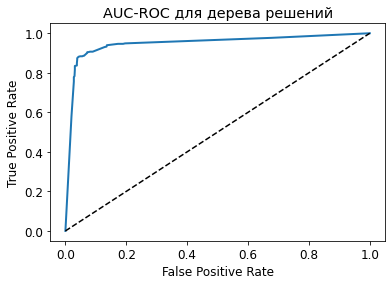

[[845  43]
 [ 67 377]]
2
frr = 0.073
far = 0.048
eer = 0.061
accuracy = 0.917
precision = 0.952
recall = 0.927
f1 = 0.939


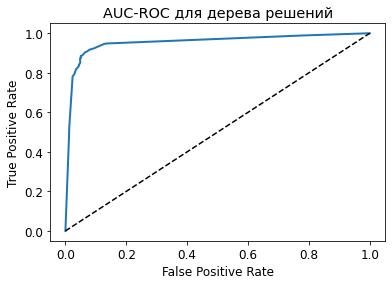

[[834  47]
 [ 60 391]]
3
frr = 0.067
far = 0.053
eer = 0.06
accuracy = 0.92
precision = 0.947
recall = 0.933
f1 = 0.94


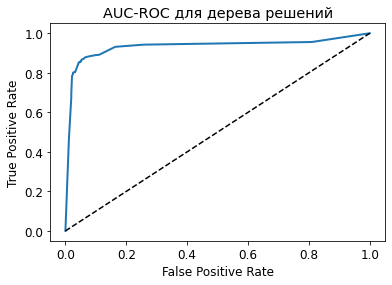

[[870  28]
 [ 57 377]]
4
frr = 0.061
far = 0.031
eer = 0.046
accuracy = 0.936
precision = 0.969
recall = 0.939
f1 = 0.953


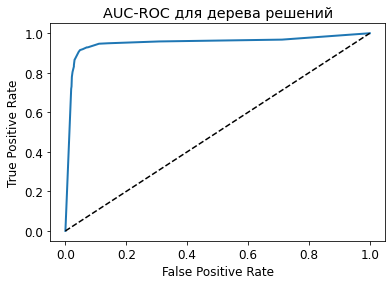

[[846  28]
 [ 54 404]]
5
frr = 0.06
far = 0.032
eer = 0.046
accuracy = 0.938
precision = 0.968
recall = 0.94
f1 = 0.954


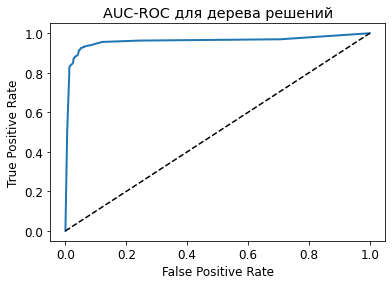

[[846  51]
 [ 43 392]]
6
frr = 0.048
far = 0.057
eer = 0.053
accuracy = 0.929
precision = 0.943
recall = 0.952
f1 = 0.947


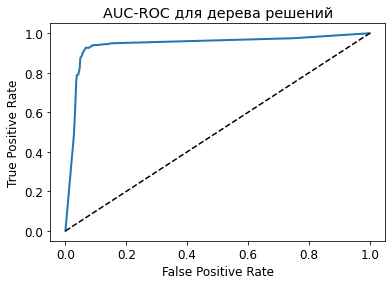

[[850  45]
 [ 48 389]]
7
frr = 0.053
far = 0.05
eer = 0.052
accuracy = 0.93
precision = 0.95
recall = 0.947
f1 = 0.948


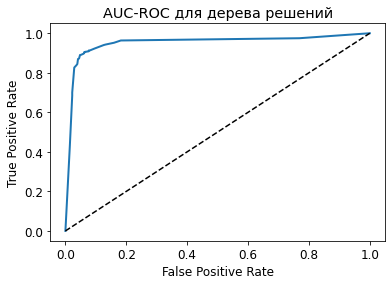

[[838  36]
 [ 71 387]]
8
frr = 0.078
far = 0.041
eer = 0.06
accuracy = 0.92
precision = 0.959
recall = 0.922
f1 = 0.94


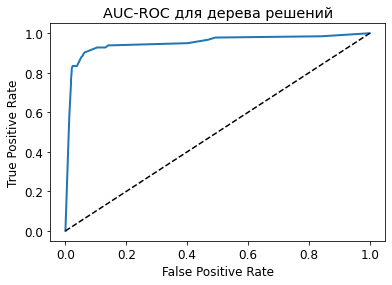

[[865  49]
 [ 44 374]]
9
frr = 0.048
far = 0.054
eer = 0.051
accuracy = 0.93
precision = 0.946
recall = 0.952
f1 = 0.949


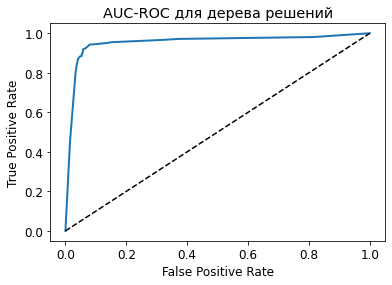

[[854  35]
 [ 55 388]]
10
frr = 0.061
far = 0.039
eer = 0.05
accuracy = 0.932
precision = 0.961
recall = 0.939
f1 = 0.95


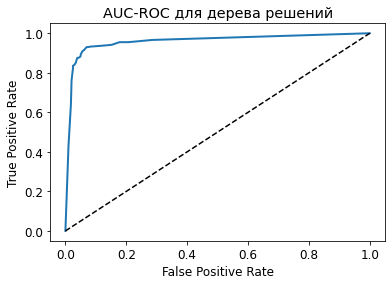

[[849  39]
 [ 34 410]]
11
frr = 0.039
far = 0.044
eer = 0.041
accuracy = 0.945
precision = 0.956
recall = 0.961
f1 = 0.959


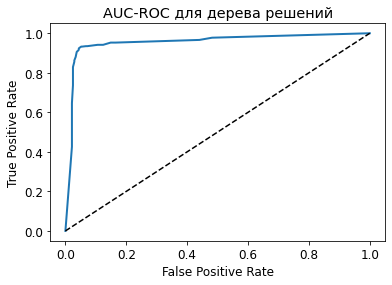

[[848  40]
 [ 64 380]]
12
frr = 0.07
far = 0.045
eer = 0.058
accuracy = 0.922
precision = 0.955
recall = 0.93
f1 = 0.942


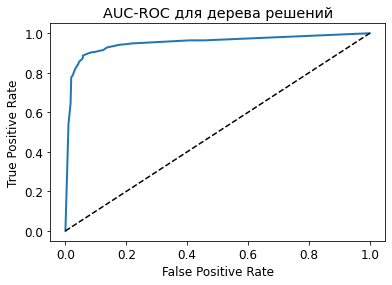

[[864  43]
 [ 42 383]]
13
frr = 0.046
far = 0.047
eer = 0.047
accuracy = 0.936
precision = 0.953
recall = 0.954
f1 = 0.953


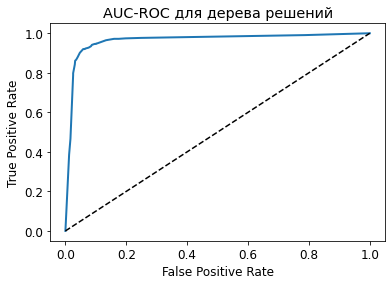

[[877  31]
 [ 40 384]]
14
frr = 0.044
far = 0.034
eer = 0.039
accuracy = 0.947
precision = 0.966
recall = 0.956
f1 = 0.961


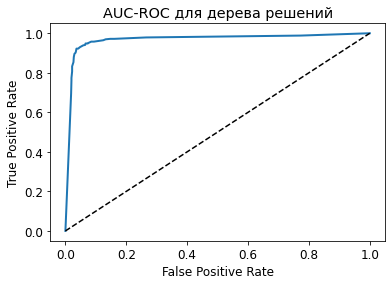

[[863  33]
 [ 58 378]]
15
frr = 0.063
far = 0.037
eer = 0.05
accuracy = 0.932
precision = 0.963
recall = 0.937
f1 = 0.95


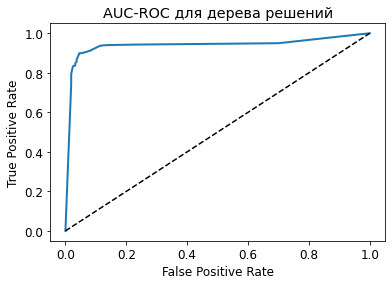

[[834  41]
 [ 66 391]]
16
frr = 0.073
far = 0.047
eer = 0.06
accuracy = 0.92
precision = 0.953
recall = 0.927
f1 = 0.94


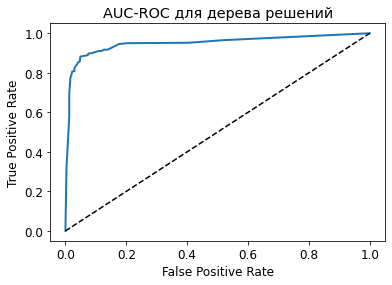

[[842  35]
 [ 47 408]]
17
frr = 0.053
far = 0.04
eer = 0.046
accuracy = 0.938
precision = 0.96
recall = 0.947
f1 = 0.954


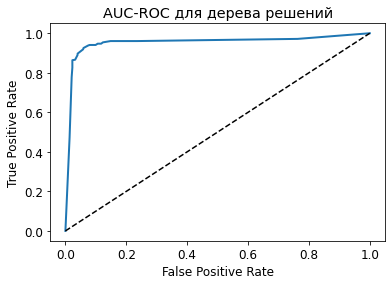

[[859  32]
 [ 51 390]]
18
frr = 0.056
far = 0.036
eer = 0.046
accuracy = 0.938
precision = 0.964
recall = 0.944
f1 = 0.954


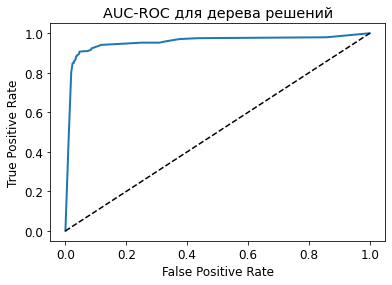

[[857  50]
 [ 71 354]]
19
frr = 0.077
far = 0.055
eer = 0.066
accuracy = 0.909
precision = 0.945
recall = 0.923
f1 = 0.934


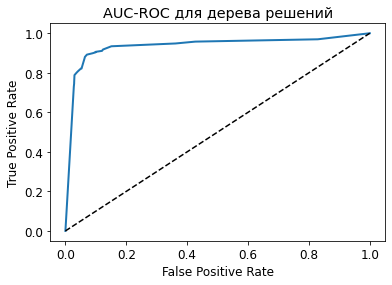

[[877  30]
 [ 58 367]]
20
frr = 0.062
far = 0.033
eer = 0.048
accuracy = 0.934
precision = 0.967
recall = 0.938
f1 = 0.952


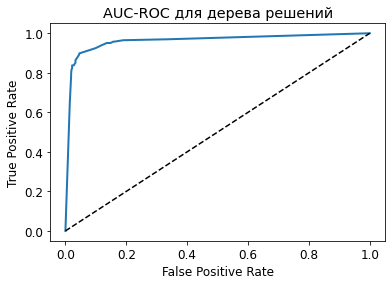

frr_sr = 0.059
far_sr = 0.043
eer_sr = 0.051
accuracy_sr = 0.93
precision_sr = 0.957
recall_sr = 0.941
F1_sr = 0.948


In [27]:
DecTree(df)